<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> MobileNet V2 </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Architecture Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 
MobileNetV2 is a popular deep neural network architecture designed for mobile devices and other resource-constrained environments. Google launched it in 2018 as an improved version of its predecessor MobileNetV1. The main goal of MobileNetV2 is to achieve high accuracy while reducing computational cost and network memory consumption.<br><br>
MobileNetV2 uses depth-separable convolutions, which consist of depth and point convolutions. This approach reduces the number of parameters in the network and makes it more efficient. In addition, MobileNetV2 implements a linear convolution consisting of a pointwise convolution and a linear activation function. This improves the non-linearity of the network while keeping the computational cost low.<br><br>
The MobileNetV2 architecture consists of several building blocks called "inverted residual blocks". Each block takes as input a tensor and performs a sequence of operations on it. The output of one block is then fed into the next block, forming a deep neural network.<br><br>
The first layer of the network is a standard convolutional layer that performs a 3x3 convolution on the input tensor. This is followed by a batch normalization layer and a ReLU activation function. The output of this layer is then passed through a series of inverted residual blocks.<br><br>
Each inverted residual block consists of three main operations: a depthwise convolution, a pointwise convolution, and a skip connection. The depthwise convolution performs a spatial convolution on each channel of the input tensor separately, followed by a batch normalization and a ReLU activation function. The pointwise convolution then applies a 1x1 convolution to the output of the depthwise convolution, followed by another batch normalization and ReLU activation. The skip connection then adds the input tensor to the output of the pointwise convolution.<br><br>
In addition to the standard inverted residual block, MobileNetV2 also includes an "expansion layer" that increases the number of channels in the input tensor before the depthwise convolution. This is followed by a "projection layer" that reduces the number of channels back to the original size before the skip connection.<br><br>
The architecture also includes a number of global pooling and fully connected layers at the end of the network, which are used to classify the input image.</div>


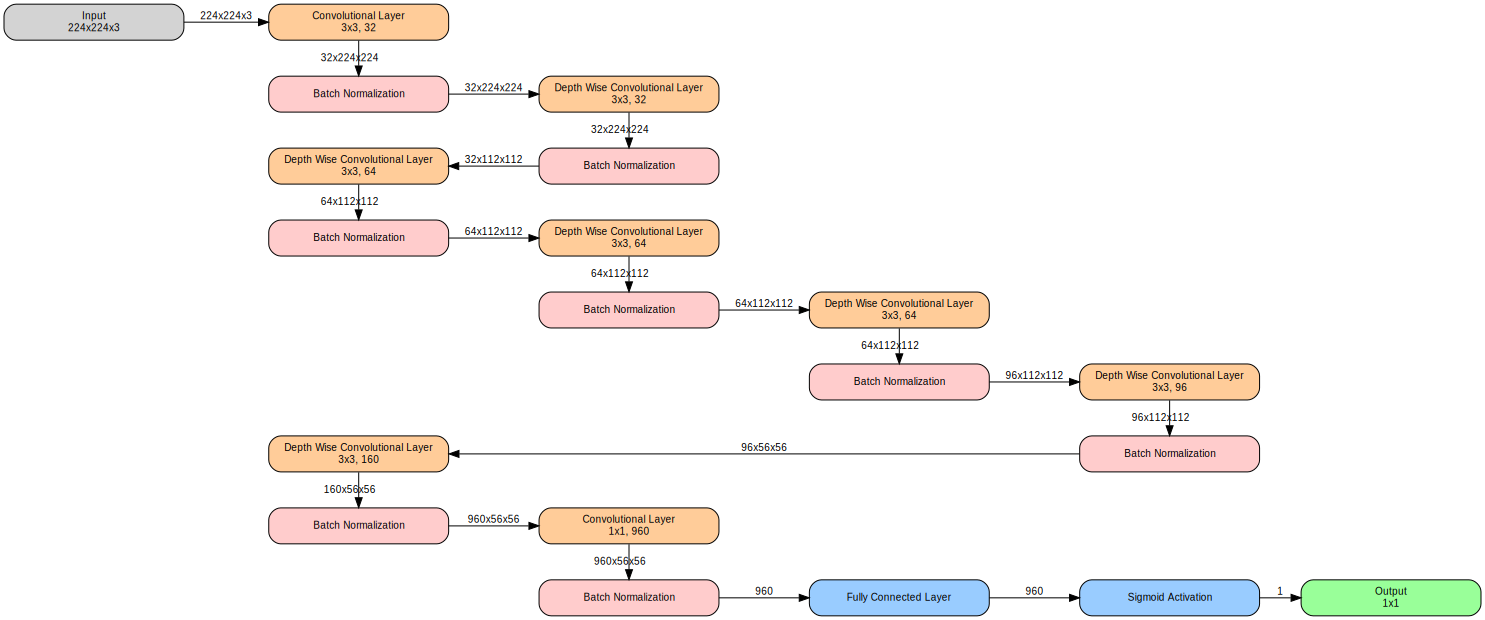

In [1]:
from IPython.display import SVG, display
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/MobileNetV2.svg'
display(SVG(filename=svg_file))

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Importing modules </div>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import zipfile
import glob
import os
import random
import pandas as pd
import numpy as np
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split

#importing various metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

# importing model relevant dependencies
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras import optimizers, regularizers
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.callbacks import EarlyStopping, LearningRateScheduler

from keras import backend as K
K.clear_session()

#

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
    This code snippet is used to extract the training and testing data from zip files in the input directory of the Kaggle Dogs-vs-Cats challenge. </div>



In [3]:

# extracting train and test data from zipfiles to data folder
zip_files = glob.glob('/kaggle/input/dogs-vs-cats/*.zip')
print("{} files found in the input directory".format(len(zip_files)))

2 files found in the input directory


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
This code snippet is used for extracting the contents of a zipped file in the "data" directory. </div>



In [4]:
for file in zip_files:
    with zipfile.ZipFile(file,'r') as Z:
        Z.extractall('data')
    print('{} extraction complete'.format(file.split('/')[-1]))

test1.zip extraction complete
train.zip extraction complete


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
This code snippet performs exploratory data analysis (EDA) on the dataset of the Kaggle Dogs-vs-Cats challenge. The objective of EDA is to gain insights into the dataset and identify any patterns or trends that can help in building a better model. </div>



In [5]:
# EDA with images in the directory
train_dir = '/kaggle/working/data/train'
test_dir = '/kaggle/working/data/test1'

print("{} is the count of images in train_dir".format(len(os.listdir(train_dir))))
print("{} is the count of images in test_dir".format(len(os.listdir(test_dir))))

25000 is the count of images in train_dir
12500 is the count of images in test_dir


In [6]:
# let's explore a sample file and how to extract label and file name from it.

for _ in range(5):
    print(random.choice(os.listdir(train_dir)))

cat.4815.jpg
cat.9053.jpg
dog.10457.jpg
cat.5710.jpg
dog.973.jpg


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 In this code snippet, we are saving the extracted data into a dataframe for further processing. </div>




In [7]:
# saving extracted data into dataframe for further processing
def label(path):
    return [file.split('.')[0] for file in os.listdir(path)]

def filename(path):
    return [file for file in os.listdir(path)]

x_train_images_name = filename(train_dir)
x_test_images_name = filename(test_dir)
y_train_label_name = label(train_dir)

#creating df with name and label

df_train_image = pd.DataFrame({'filename':x_train_images_name, 'label':y_train_label_name})
df_submission = pd.DataFrame({'filename':x_test_images_name})

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 In this code snippet, We are printing out the head of the dataframe </div>

In [8]:
df_train_image.head()


,filename,label
0,dog.10702.jpg,dog
1,dog.9366.jpg,dog
2,cat.3035.jpg,cat
3,cat.2672.jpg,cat
4,dog.5299.jpg,dog


In [9]:
df_submission.head()


,filename
0,3622.jpg
1,11783.jpg
2,3033.jpg
3,6016.jpg
4,8825.jpg


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 The code iterates over the loop five times, each time selecting a random image from the training directory. </div>

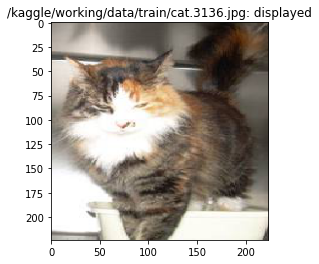

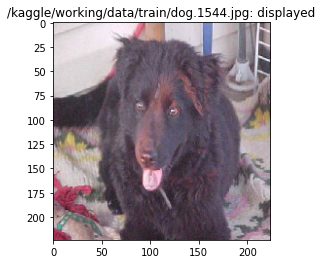

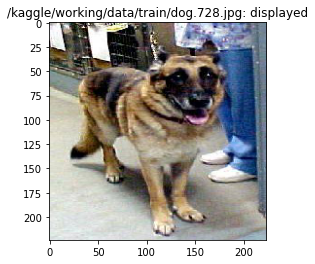

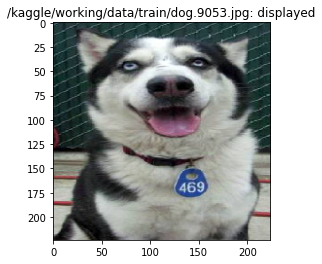

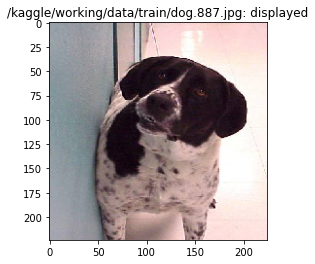

In [10]:
# training directory
for _ in range(5):
    file_name = train_dir + "/"+ random.choice(os.listdir(train_dir))
    #read image
    image = load_img(file_name, target_size=(224,224))
    plt.imshow(image)
    plt.title("{}: displayed".format(file_name))
    plt.show()
    

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 The code iterates over the loop five times, each time selecting a random image from the test directory. </div>

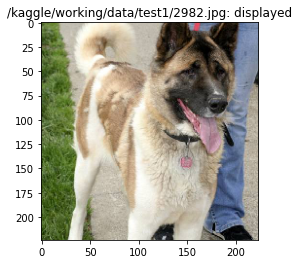

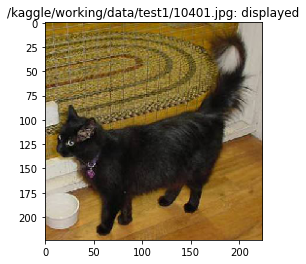

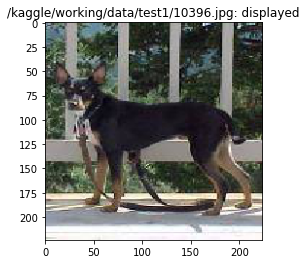

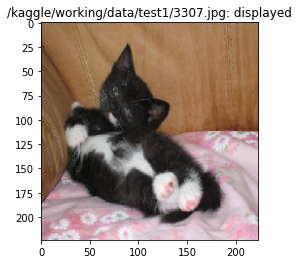

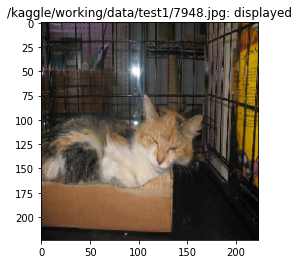

In [11]:
# test directory
for _ in range(5):
    file_name = test_dir + "/"+ random.choice(os.listdir(test_dir))
    #read image
    image = load_img(file_name, target_size=(224,224))
    plt.imshow(image)
    plt.title("{}: displayed".format(file_name))
    plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 This code snippet is used to split the dataset into train, validation, and test sets. </div>



In [12]:
# splitting the data into train test
train_val_df, test_df = train_test_split(df_train_image, test_size=0.02)
# splitting the train val further into train, val
train_df, val_df = train_test_split(train_val_df, test_size=0.2)

print("Total number of images in the train is {}".format(train_df.shape[0]))
print("Total number of images in the internal test is {}".format(test_df.shape[0]))
print("Total number of images in the val is {}".format(val_df.shape[0]))
print("Total number of images in the submission is {}".format(df_submission.shape[0]))

Total number of images in the train is 19600
Total number of images in the internal test is 500
Total number of images in the val is 4900
Total number of images in the submission is 12500


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 This code snippet uses the seaborn library to create a countplot graph that shows the distribution of data within each of the three sets - train, validation, and internal testing data - in the Kaggle Dogs-vs-Cats challenge. </div>


<AxesSubplot:xlabel='label', ylabel='count'>

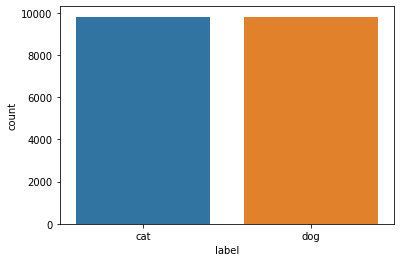

In [13]:

# checking the data distribution within each train,val and internal testing data.
sns.countplot(x ='label', data = train_df)

<AxesSubplot:xlabel='label', ylabel='count'>

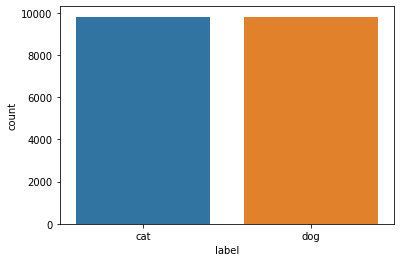

In [14]:
sns.countplot(x ='label', data = train_df)

<AxesSubplot:xlabel='label', ylabel='count'>

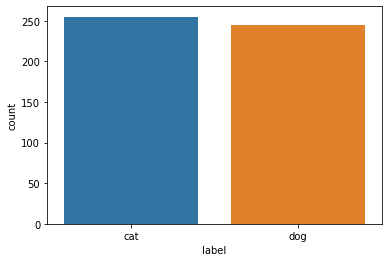

In [15]:
sns.countplot(x ='label', data = test_df)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
    📌 <b> Classification with MobileNetV2 </b></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 This code snippet is used to prepare the data for the Kaggle Dogs-vs-Cats challenge using image augmentation with the help of Image Data Generator from Keras. </div>



In [16]:
# Image augmentation data preparation with Image Data Generator
img_size = 224
batch_size = 1024
train_aug_map = ImageDataGenerator(
                rotation_range=10,
                horizontal_flip = True,
                fill_mode = 'nearest',
                preprocessing_function = preprocess_input)

train_data = train_aug_map.flow_from_dataframe(
                            train_df, train_dir,
                            x_col='filename',
                            y_col = 'label',
                            target_size = (img_size, img_size),
                            batch_size= batch_size,
                            class_mode='categorical')


val_aug_mag = ImageDataGenerator(
                preprocessing_function = preprocess_input)

val_data = val_aug_mag.flow_from_dataframe(
                            val_df, train_dir,
                            x_col='filename',
                            y_col = 'label',
                            target_size = (img_size, img_size),
                            batch_size= batch_size,
                            class_mode='categorical')

test_aug_map = ImageDataGenerator(
                preprocessing_function = preprocess_input)

test_data = val_aug_mag.flow_from_dataframe(
                            test_df, train_dir,
                            x_col='filename',
                            y_col = None,
                            class_mode = None,
                            target_size = (img_size, img_size),
                            shuffle = False)

Found 19600 validated image filenames belonging to 2 classes.
Found 4900 validated image filenames belonging to 2 classes.
Found 500 validated image filenames.


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 The code snippet is building Mobilenetv2 </div>

In [17]:
# building mobile net model
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobilenet.trainable = False
mobilenet_model = Sequential([mobilenet,Flatten(),Dense(1024, activation='relu'),
                             Dropout(0.4), Dense(2,activation='softmax')])

optimizer = tf.keras.optimizers.Adam(1e-6)

mobilenet_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              64226304  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 66,486,338
Trainable params: 64,228,354
Non-trainable params: 2,257,984
_________________________________________________________________


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Defining early stopping criterion </div>

In [18]:

epoch = 50
learning_rate = 3e-5 
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5 
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = .8

def adjustable_lr(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr
    
    
early_stop = EarlyStopping(patience=5)
lr_callback = LearningRateScheduler(adjustable_lr, verbose=True)
callbacks = [early_stop, lr_callback]

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Training the model </div>

In [20]:
mobilenet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
train_images = train_df.shape[0]
val_images = val_df.shape[0]
history = mobilenet_model.fit_generator(train_data, epochs=20, validation_data=val_data, validation_steps=val_images//batch_size, steps_per_epoch=train_images//batch_size, callbacks=callbacks)

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 1e-08.
19/19 [==============================] - 280s 15s/step - loss: 1.0734 - accuracy: 0.5530 - val_loss: 0.8456 - val_accuracy: 0.5801
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 3e-05.
19/19 [==============================] - 274s 14s/step - loss: 0.2658 - accuracy: 0.9446 - val_loss: 0.1469 - val_accuracy: 0.9822
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 3e-05.
19/19 [==============================] - 275s 14s/step - loss: 0.1826 - accuracy: 0.9787 - val_loss: 0.1127 - val_accuracy: 0.9844
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 2.4200000000000002e-05.
19/19 [==============================] - 273s 14s/step - loss: 0.1193 - accuracy: 0.9814 - val_loss: 0.0854 - val_accuracy: 0.9858
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 1.9560000000000006e-05.
19/19 [==============================] - 273s 1

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Plotting accuracy and loss plots for train and val splits </div>

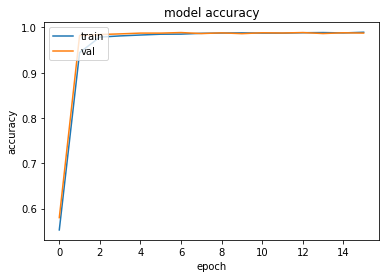

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

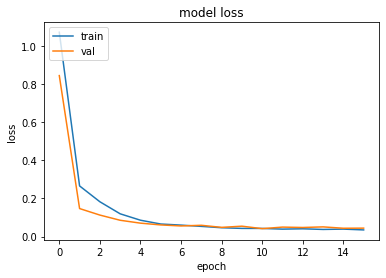

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
mobilenet_v2_pred = mobilenet_model.predict_generator(test_data)
test_df['prediction'] = np.argmax(mobilenet_v2_pred, axis=-1)
labels = dict((v,k) for k,v in train_data.class_indices.items())
test_df['prediction'] = test_df['prediction'].map(labels)

In [24]:
mobilenet_confusion_matrix = confusion_matrix(test_df['label'], test_df['prediction'])
print(mobilenet_confusion_matrix)

[[251   4]
 [  3 242]]


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Generating predictions on submission dataframe </div>

In [25]:
mobilenet_submission_augmap = ImageDataGenerator(preprocessing_function = preprocess_input)
mobilenet_submission_data = mobilenet_submission_augmap.flow_from_dataframe(
             df_submission, test_dir,
             x_col = 'filename',
             y_col = None,
             class_mode = None,
             target_size = (img_size, img_size),
             shuffle = False)

Found 12500 validated image filenames.


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Writing the predictions </div>

In [26]:
mobilenet_submission_pred = mobilenet_model.predict_generator(mobilenet_submission_data)
df_submission['prediction'] = np.argmax(mobilenet_submission_pred, axis = -1)
labels = dict((v,k) for k,v in train_data.class_indices.items())
#df_submission['prediction'] = df_submission['prediction'].map(labels)

In [27]:
# finally printing

df_submission

,filename,prediction
0,3622.jpg,0
1,11783.jpg,0
2,3033.jpg,0
3,6016.jpg,1
4,8825.jpg,0
...,...,...
12495,10368.jpg,1
12496,10121.jpg,0
12497,10571.jpg,1
12498,1039.jpg,0
